In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Look at directory
%cd /content/drive/My Drive/data/YoloCountyCrops
%ls # then you should see the data file

/content/drive/My Drive/data/YoloCountyCrops
model.png  YoloCountyCropsML.csv


In [ ]:
#Load the data
data=pd.read_table("YoloCountyCropsML.csv", sep=",")

In [ ]:
#Take a quick look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1567 non-null   int64  
 1   OBJECTID    1567 non-null   int64  
 2   OBJECTID_1  1567 non-null   int64  
 3   acres       1567 non-null   float64
 4   croptype    1567 non-null   object 
 5   Band2       1567 non-null   float64
 6   Band3       1567 non-null   float64
 7   Band4       1567 non-null   float64
 8   Band8       1567 non-null   float64
 9   Band5       1567 non-null   float64
 10  Band6       1567 non-null   float64
 11  Band7       1567 non-null   float64
 12  Band11      1567 non-null   float64
 13  Band12      1567 non-null   float64
 14  Band8A      1567 non-null   float64
 15  EVI         1567 non-null   float64
 16  GCI         1567 non-null   float64
 17  NDTI        1567 non-null   float64
 18  PSRI        1567 non-null   float64
 19  SAVI        1567 non-null  

In [ ]:
# define X (input features), and y(class labels) - occupancy data
X=data.drop(["Unnamed: 0","OBJECTID", "OBJECTID_1", "acres", "croptype"],axis=1)
y=data["croptype"]

In [ ]:
# Split data into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Build Random Forest Classifier
forest = RandomForestClassifier(n_estimators=80, n_jobs=-1, 
                                random_state=42)
forest.fit(X_train, Y_train)
Y_predRF = forest.predict(X_test)
#Get Scores
print('Training set score: {:.4f}'.format(forest.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(forest.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.8705


<Axes: >

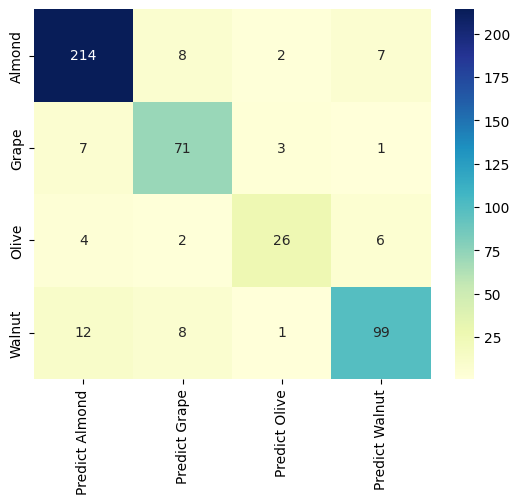

In [ ]:
#Create confusion matrix for Random Forests
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(Y_test, Y_predRF)

cm_matrix = pd.DataFrame(data=confusionmatrix, columns=['Predict Almond', 'Predict Grape', 'Predict Olive', 'Predict Walnut'], 
                                 index=['Almond', 'Grape', 'Olive', 'Walnut'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#calculate accuracy
print(214 / (214 + 8 + 2 +7)) #Almonds
print(71 / (71 + 7 + 3 +1)) #Grapes
print(26 / (26 + 6 + 4 + 2)) #Olives
print(99 / (99 + 12 + 8 +1)) #Walnuts


0.9264069264069265
0.8658536585365854
0.6842105263157895
0.825
